In [1]:
import pickle
import os
os.chdir(os.path.join('..'))

import pandas as pd
pd.set_option('display.max_columns', None)

from fair_graphs.datasets.datasets_utils import clean_store_graph_dataset
from fair_graphs.datasets.datasets_utils import plot_distributions_sunburst

## Bail

In [6]:
file_path = os.path.join('data', 'bail', 'bail.csv')
sens = "WHITE"
pred = "RECID"

In [13]:
# Check raw data
raw = pd.read_csv(file_path)
raw.shape

(18876, 19)

In [14]:
raw.describe()

,WHITE,ALCHY,JUNKY,SUPER,MARRIED,FELON,WORKREL,PROPTY,PERSON,MALE,PRIORS,SCHOOL,RULE,AGE,TSERVD,FOLLOW,RECID,TIME,FILE
count,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000,18876.000000
mean,0.506410,0.173395,0.139807,0.726902,0.263350,0.329307,0.405488,0.324274,0.082168,0.941778,0.722770,9.480928,1.401727,350.936427,19.228385,63.204387,0.376351,8.309970,2.293706
std,0.499972,0.378598,0.346796,0.445563,0.440462,0.469974,0.490999,0.468115,0.274628,0.234169,3.963878,2.585340,3.413046,125.020249,25.883106,12.425075,0.484483,14.977488,0.722970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,177.000000,0.000000,46.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,257.000000,5.000000,52.000000,0.000000,0.000000,2.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,313.000000,10.000000,57.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,11.000000,1.000000,408.000000,24.000000,75.000000,1.000000,11.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,19.000000,77.000000,945.000000,354.000000,81.000000,1.000000,81.000000,3.000000


In [15]:
clean_store_graph_dataset(path_to_file = file_path,
                          sensitive_attr = sens, prediction_attr = pred,
                          evaluated_group = None, evaluated_class = None,
                          dropped_cols = None)

In [16]:
file_name = f'bail_sensitive_{sens}_label_{pred}.pickle'
res_dict = pickle.load(open(os.path.join('data', 'bail', file_name), 'rb'))

In [7]:
from fair_graphs.datasets.graph_datasets import BailData

data = BailData(sens, pred,
                include_sensitive = True,
                num_samples = 0,
                pre_scale_features = False)

Total samples: 18876
Class distribution:
	class 0: 11772
	class 1: 7104
Sensitive distribution:
	group 0: 9317
	group 1: 9559
Class-group distribution:
	class 0, group 0: 5457
	class 0, group 1: 6315
	class 1, group 0: 3860
	class 1, group 1: 3244


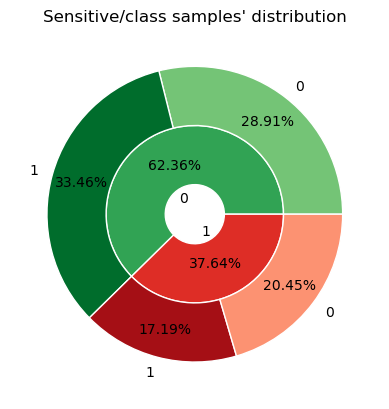

In [7]:
plot_distributions_sunburst(data, obj='samples')

Total edges: 148452
Class distribution:
	class 0: 98136
	class 1: 50316
Sensitive distribution:
	group hetero: 60182
	group homo: 88270
Class-group distribution:
	class 0, group hetero: 48833
	class 0, group homo: 49303
	class 1, group hetero: 25144
	class 1, group homo: 25172


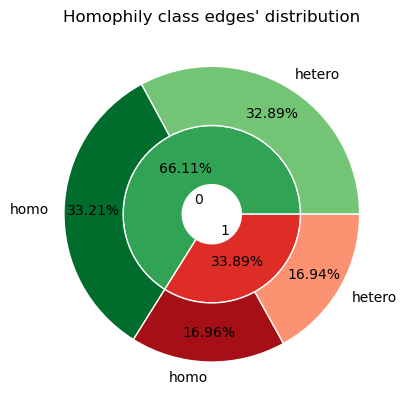

In [8]:
plot_distributions_sunburst(data, obj='edges')

## Credit

In [9]:
sens = "Age"
pred = "NoDefaultNextMonth"
file_path = os.path.join('data', 'credit', 'credit.csv')

In [19]:
# Check raw data
raw = pd.read_csv(file_path)
raw.shape

(30000, 15)

In [20]:
# categorical variable: EducationLevel
raw.describe()

,NoDefaultNextMonth,Married,Single,Age,EducationLevel,MaxBillAmountOverLast6Months,MaxPaymentAmountOverLast6Months,MonthsWithZeroBalanceOverLast6Months,MonthsWithLowSpendingOverLast6Months,MonthsWithHighSpendingOverLast6Months,MostRecentBillAmount,MostRecentPaymentAmount,TotalOverdueCounts,TotalMonthsOverdue,HistoryOfOverduePayments
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.778800,0.455300,0.532133,0.089500,2.157733,1849.565000,483.785333,0.788833,2.833133,1.208333,1564.743000,172.783000,0.371600,1.687700,0.335633
std,0.415062,0.498006,0.498975,0.285469,0.744494,2393.945925,1158.335091,1.171475,2.764274,2.026853,2247.550865,505.793969,0.553043,3.609322,0.472219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000,310.000000,70.000000,0.000000,0.000000,0.000000,110.000000,30.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,2.000000,950.000000,150.000000,0.000000,2.000000,0.000000,680.000000,60.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,3.000000,2430.000000,370.000000,1.000000,6.000000,2.000000,2050.000000,150.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,50810.000000,51430.000000,6.000000,6.000000,6.000000,29450.000000,26670.000000,3.000000,36.000000,1.000000


In [21]:
clean_store_graph_dataset(path_to_file = file_path,
                          sensitive_attr = sens, prediction_attr = pred,
                          evaluated_group = None, evaluated_class = None,
                          dropped_cols = ['Single'])

In [22]:
file_name = f'credit_sensitive_{sens}_label_{pred}.pickle'
res_dict = pickle.load(open(os.path.join('data', 'credit', file_name), 'rb'))

In [10]:
from fair_graphs.datasets.graph_datasets import CreditData

data = CreditData(sens, pred,
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

Total samples: 30000
Class distribution:
	class 0: 6636
	class 1: 23364
Sensitive distribution:
	group 0: 27315
	group 1: 2685
Class-group distribution:
	class 0, group 0: 5906
	class 0, group 1: 730
	class 1, group 0: 21409
	class 1, group 1: 1955


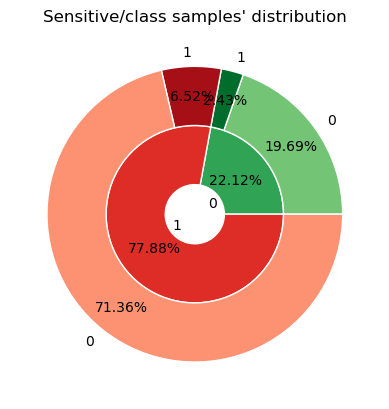

In [11]:
plot_distributions_sunburst(data, obj='samples')

Total edges: 222366
Class distribution:
	class 0: 60744
	class 1: 161622
Sensitive distribution:
	group hetero: 19490
	group homo: 202876
Class-group distribution:
	class 0, group hetero: 7810
	class 0, group homo: 52934
	class 1, group hetero: 25451
	class 1, group homo: 136171


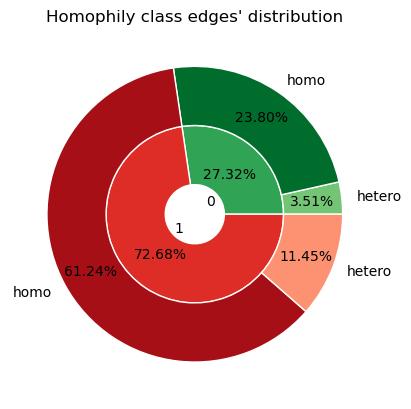

In [12]:
plot_distributions_sunburst(data, obj='edges')

## German

In [4]:
sens = "Gender"
pred = "GoodCustomer"
file_path = os.path.join('data', 'german', 'german.csv')

In [7]:
# Check raw data
raw = pd.read_csv(file_path)
raw.shape

(1000, 30)

In [8]:
raw.describe()

,GoodCustomer,ForeignWorker,Single,Age,LoanDuration,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,NumberOfOtherLoansAtBank,NumberOfLiableIndividuals,HasTelephone,CheckingAccountBalance_geq_0,CheckingAccountBalance_geq_200,SavingsAccountBalance_geq_100,SavingsAccountBalance_geq_500,MissedPayments,NoCurrentLoan,CriticalAccountOrLoansElsewhere,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,0.400000,0.037000,0.54800,35.546000,20.903000,3271.258000,2.973000,2.845000,1.407000,1.155000,0.404000,0.332000,0.063000,0.214000,0.111000,0.912000,0.049000,0.293000,0.13900,0.0,0.041000,0.052000,0.713000,0.179000,0.062000,0.172000,0.42700,0.778000
std,0.916974,0.188856,0.49794,11.375469,12.058814,2822.736876,1.118715,1.103718,0.577654,0.362086,0.490943,0.471167,0.243085,0.410332,0.314289,0.283437,0.215976,0.455366,0.34612,0.0,0.198389,0.222138,0.452588,0.383544,0.241276,0.377569,0.49489,0.415799
min,-1.000000,0.000000,0.00000,19.000000,4.000000,250.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,-1.000000,0.000000,0.00000,27.000000,12.000000,1365.500000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,1.000000,0.000000,1.00000,33.000000,18.000000,2319.500000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,1.000000,0.000000,1.00000,42.000000,24.000000,3972.250000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000
max,1.000000,1.000000,1.00000,75.000000,72.000000,18424.000000,4.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [9]:
clean_store_graph_dataset(path_to_file = file_path,
                          sensitive_attr = sens, prediction_attr = pred,
                          evaluated_group = None, evaluated_class = None,
                          dropped_cols = ['OtherLoansAtStore', 'PurposeOfLoan'])

In [5]:
file_name = f'german_sensitive_{sens}_label_{pred}.pickle'
res_dict = pickle.load(open(os.path.join('data', 'german', file_name), 'rb'))

In [6]:
from fair_graphs.datasets.graph_datasets import GermanData

data = GermanData(sens, pred,
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

Total samples: 1000
Class distribution:
	class 0: 300
	class 1: 700
Sensitive distribution:
	group 0: 310
	group 1: 690
Class-group distribution:
	class 0, group 0: 109
	class 0, group 1: 191
	class 1, group 0: 201
	class 1, group 1: 499


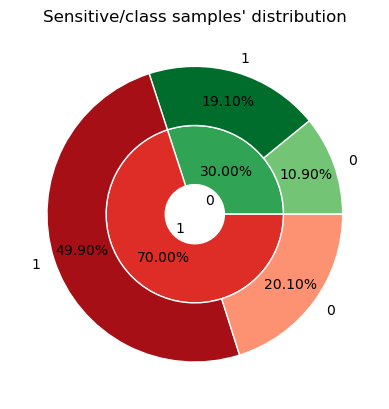

In [9]:
plot_distributions_sunburst(data, obj='samples')

Total edges: 3662
Class distribution:
	class 0: 1052
	class 1: 2610
Sensitive distribution:
	group hetero: 1060
	group homo: 2602
Class-group distribution:
	class 0, group hetero: 466
	class 0, group homo: 586
	class 1, group hetero: 1063
	class 1, group homo: 1547


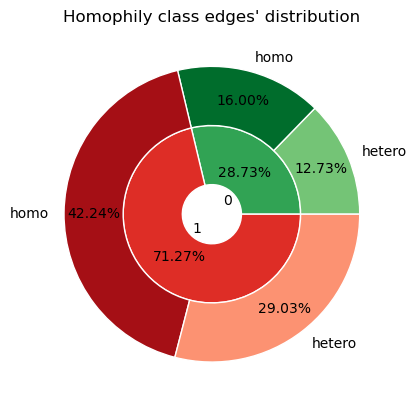

In [16]:
plot_distributions_sunburst(data, obj='edges')

## Pokec

In [5]:
sens = "region"
pred = "marital_status_indicator"
file_path = os.path.join('data', 'pokec', 'pokec.csv')
file_path_rel = os.path.join('data', 'pokec', 'pokec_relationship_posIdx.txt')

In [6]:
# Check raw data
import numpy as np

raw = pd.read_csv(file_path)
rel = np.loadtxt(file_path_rel, dtype=int)

raw.shape, rel.shape

((67796, 279), (882765, 2))

In [40]:
raw.describe()

,user_id,public,completion_percentage,gender,region,AGE,I_am_working_in_field,spoken_languages_indicator,anglicky,nemecky,rusky,francuzsky,spanielsky,taliansky,slovensky,japonsky,hobbies_indicator,priatelia,sportovanie,pocuvanie hudby,pozeranie filmov,spanie,kupalisko,party,cestovanie,kino,diskoteky,nakupovanie,tancovanie,turistika,surfovanie po webe,praca s pc,sex,pc hry,stanovanie,varenie,jedlo,fotografovanie,citanie,malovanie,chovatelstvo,domace prace,divadlo,prace okolo domu,prace v zahrade,chodenie do muzei,zberatelstvo,hackovanie,I_most_enjoy_good_food_indicator,pri telke,v dobrej restauracii,pri svieckach s partnerom,v posteli,v prirode,z partnerovho bruska,v kuchyni pri stole,pets_indicator,pes,mam psa,nemam ziadne,macka,rybky,mam macku,mam rybky,vtacik,body_type_indicator,priemerna,vysportovana,chuda,velka a pekna,tak trosku pri sebe,eye_color_indicator,hnede,modre,zelene,hair_color_indicator,cierne,blond,plave,hair_type_indicator,kratke,dlhe,rovne,po plecia,kucerave,na jezka,completed_level_of_education_indicator,stredoskolske,zakladne,vysokoskolske,ucnovske,favourite_color_indicator,modra,cierna,cervena,biela,zelena,fialova,zlta,ruzova,oranzova,hneda,relation_to_smoking_indicator,nefajcim,fajcim pravidelne,fajcim prilezitostne,uz nefajcim,relation_to_alcohol_indicator,pijem prilezitostne,abstinent,nepijem,on_pokec_i_am_looking_for_indicator,dobreho priatela,priatelku,niekoho na chatovanie,udrzujem vztahy s priatelmi,vaznu znamost,sexualneho partnera,dlhodoby seriozny vztah,love_is_for_me_indicator,nie je nic lepsie,ako byt zamilovany(a),v laske vidim zmysel zivota,v laske som sa sklamal(a),preto som velmi opatrny(a),laska je zakladom vyrovnaneho sexualneho zivota,romanticka laska nie je pre mna,davam prednost realite,relation_to_casual_sex_indicator,nedokazem mat s niekym sex bez lasky,to skutocne zalezi len na okolnostiach,sex mozem mat iba s niekym,koho dobre poznam,dokazem mat sex s kymkolvek,kto dobre vyzera,my_partner_should_be_indicator,mojou chybajucou polovickou,laskou mojho zivota,moj najlepsi priatel,absolutne zodpovedny a spolahlivy,hlavne spolocensky typ,clovek,ktoreho uplne respektujem,hlavne dobry milenec,niekto,marital_status_indicator,slobodny(a),mam vazny vztah,zenaty (vydata),rozvedeny(a),slobodny,relation_to_children_indicator,v buducnosti chcem mat deti,I_like_movies_indicator,komedie,akcne,horory,serialy,romanticke,rodinne,sci-fi,historicke,vojnove,zahadne,mysteriozne,dokumentarne,eroticke,dramy,fantasy,muzikaly,kasove trhaky,umelecke,alternativne,I_like_watching_movie_indicator,doma z gauca,v kine,u priatela,priatelky,I_like_music_indicator,disko,pop,rock,rap,techno,house,hitparadovky,sladaky,hip-hop,metal,soundtracky,punk,oldies,folklor a ludovky,folk a country,jazz,klasicka hudba,opery,alternativa,trance,I_mostly_like_listening_to_music_indicator,kedykolvek a kdekolvek,na posteli,pri chodzi,na dobru noc,na diskoteke,s partnerom,vo vani,v aute,na koncerte,pri sexe,v praci,the_idea_of_good_evening_indicator,pozerat dobry film v tv,pocuvat dobru hudbu,s kamaratmi do baru,ist do kina alebo divadla,surfovat na sieti a chatovat,ist na koncert,citat dobru knihu,nieco dobre uvarit,zhasnut svetla a meditovat,ist do posilnovne,I_like_specialties_from_kitchen_indicator,slovenskej,talianskej,cinskej,mexickej,francuzskej,greckej,morske zivocichy,vegetarianskej,japonskej,indickej,I_am_going_to_concerts_indicator,ja na koncerty nechodim,zriedkavo,my_active_sports_indicator,plavanie,futbal,kolieskove korcule,lyzovanie,korculovanie,behanie,posilnovanie,tenis,hokej,basketbal,snowboarding,pingpong,auto-moto sporty,bedminton,volejbal,aerobik,bojove sporty,hadzana,skateboarding,my_passive_sports_indicator,baseball,golf,horolezectvo,bezkovanie,surfing,I_like_books_indicator,necitam knihy,o zabave,humor,hry,historicke romany,rozpravky,odbornu literaturu,psychologicku literaturu,literaturu pre rozvoj osobnosti,cestopisy,literaturu faktu,poeziu,zivotopisne a pamate,pocitacovu literaturu,filozoficku literaturu,literat

In [36]:
clean_store_graph_dataset(path_to_file = file_path,
                          sensitive_attr = sens, prediction_attr = pred,
                          evaluated_group = None, evaluated_class = None,
                          dropped_cols = ['user_id','I_am_working_in_field'],
                          relationship_file = file_path_rel)

In [41]:
file_name = f'pokec_sensitive_{sens}_label_{pred}.pickle'
res_dict = pickle.load(open(os.path.join('data', 'pokec', file_name), 'rb'))

In [14]:
from fair_graphs.datasets.graph_datasets import PokecData

data = PokecData(sens, pred,
                 include_sensitive = True,
                 num_samples = 0,
                 pre_scale_features = False)

Total samples: 67796
Class distribution:
	class 0: 34757
	class 1: 33039
Sensitive distribution:
	group 0: 43962
	group 1: 23834
Class-group distribution:
	class 0, group 0: 22981
	class 0, group 1: 11776
	class 1, group 0: 20981
	class 1, group 1: 12058


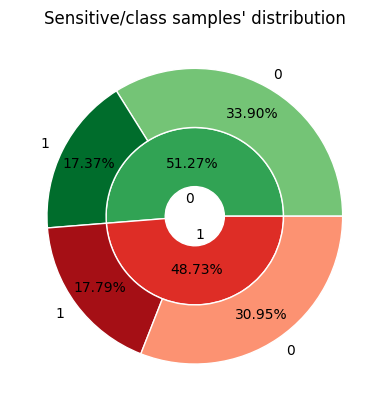

In [15]:
plot_distributions_sunburst(data, obj='samples')

Total edges: 2
Class distribution:
	class 0: 557564
	class 1: 746148
Sensitive distribution:
	group hetero: 0
	group homo: 2
Class-group distribution:
	class 0, group hetero: 247490
	class 0, group homo: 310074
	class 1, group hetero: 342658
	class 1, group homo: 403490


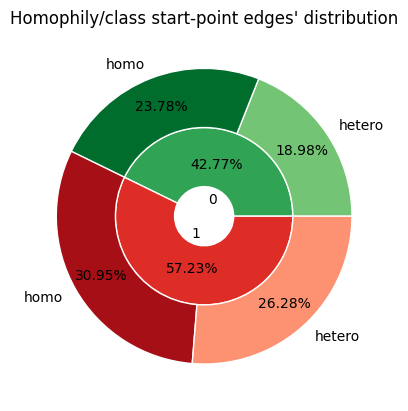

In [16]:
plot_distributions_sunburst(data, obj='edges')

## Plot Cumulative Distributions

In [2]:
from fair_graphs.datasets.graph_datasets import (BailData, CreditData, GermanData,
                                                 PokecData, FacebookData, GooglePlusData)

bail_data = BailData("WHITE", "RECID",
                include_sensitive = True,
                num_samples = 0,
                pre_scale_features = False)

credit_data = CreditData("Age", "NoDefaultNextMonth",
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

german_data = GermanData("Gender", "GoodCustomer",
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

pokec_data = PokecData("region", "marital_status_indicator",
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

facebook_data = FacebookData("gender", "egocircle",
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

gplus_data = GooglePlusData("gender", "egocircle",
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

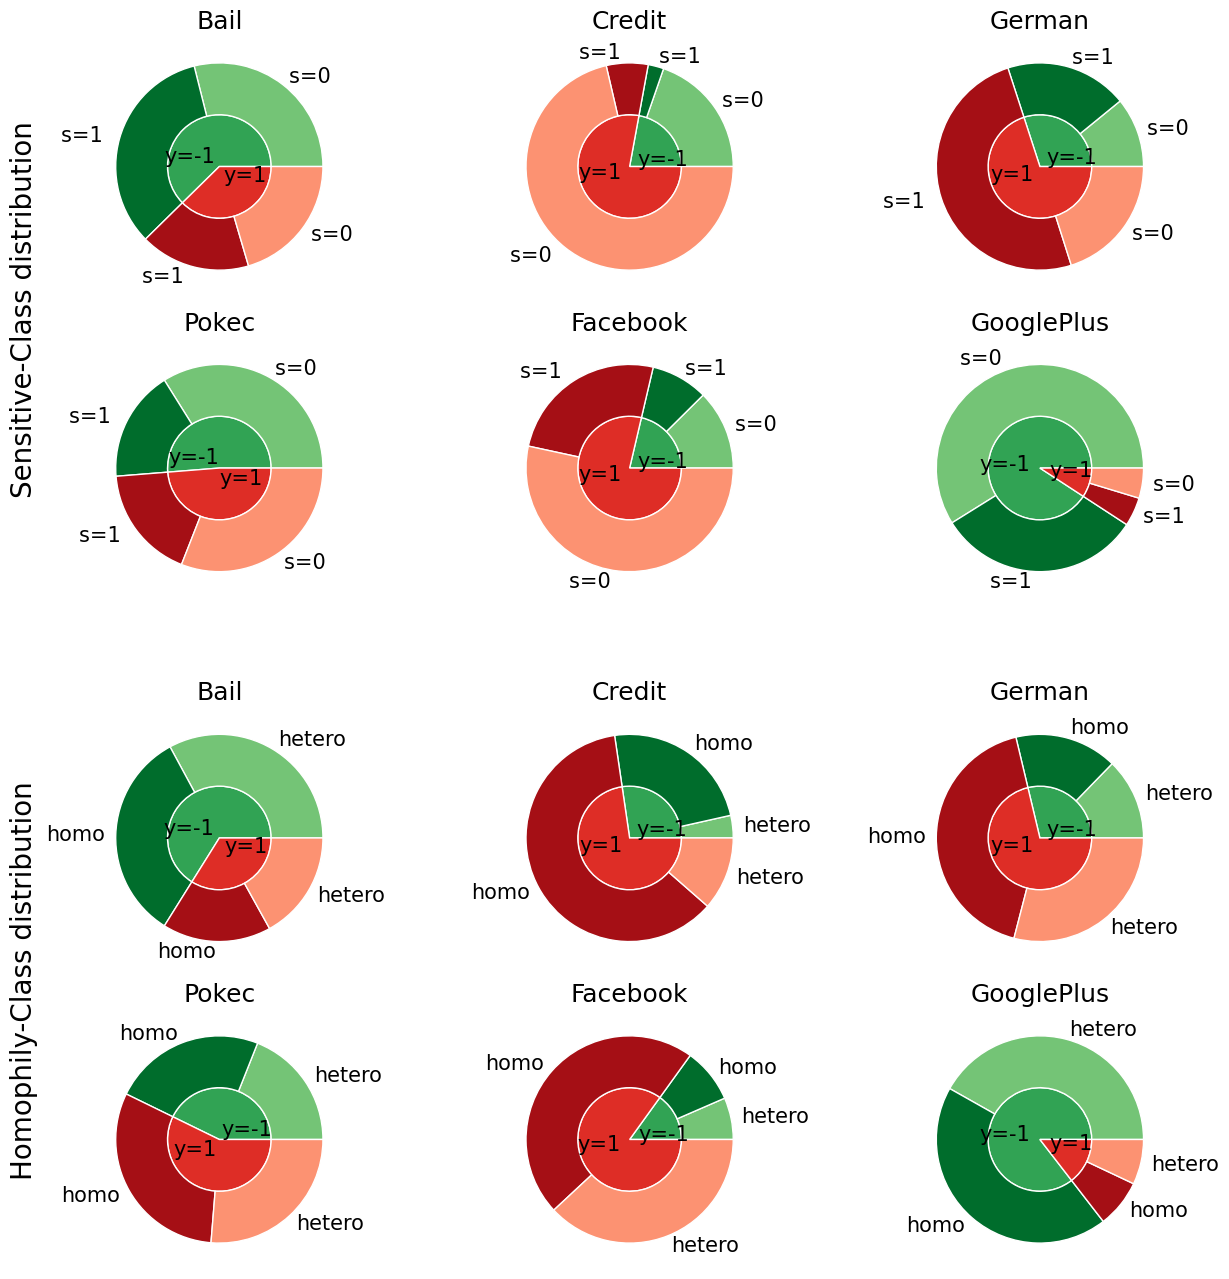

In [112]:
from fair_graphs.datasets.datasets_utils import plot_cum_distributions_sunburst

pl_d = {'Bail': bail_data,
        'Credit': credit_data,
        'German': german_data,
        'Pokec': pokec_data,
        'Facebook': facebook_data,
        'GooglePlus': gplus_data,
        }

plot_cum_distributions_sunburst(pl_d)